In [1]:
# Importing Packages and Libraries
import shap
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, OneHotEncoder

Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)


In [2]:
# Load data
file_path1 = '/Users/paulahofmann/Documents/Coding/Online-Review/FeaturePreperation/Data_with_Features/Final Data/Hedonic_Final.csv'
df = pd.read_csv(file_path1)



# 1. Preperation of Features

In [3]:
# Drop unnecessary columns
columns_to_drop = ['title_x', 'text', 'images', 'asin', 'parent_asin', 'user_id',
       'timestamp', 'verified_purchase', 'text_cleaned',
       'text_cleaned1','main_category','features','neutral_score','day_of_week',]
df.drop(columns=columns_to_drop, inplace=True)

In [4]:
# Mapping dictionary for sentiment transformation
sentiment_mapping = {'positive': 2, 'neutral': 1, 'negative': 0}

# Using map function to create a new column 'sentiment_c' with transformed values
df['sentiment_c'] = df['Sentiment_Classification'].map(sentiment_mapping)

In [5]:
# Create a new column 'helpful' based on the condition
df['helpful'] = (df['helpful_vote'] > 0).astype(int)


In [6]:
# Define features and target variable
features = ['rating', 'sentiment_c','word_count', 'sent_count', 'sent_length', 'title_length', 'elap_days',
       'image', 'ver_purch','FRE','#nouns','#adj', '#adv', 'subjective_score','product']
target = 'helpful'

In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, classification_report
import statsmodels.api as sm


# Define numerical features and the target
numerical_features = ['rating', 'sentiment_c', 'word_count', 'sent_count', 'sent_length', 'title_length', 'elap_days', 'image', 'ver_purch', 'FRE', '#nouns', '#adj', '#adv', 'subjective_score']
target = 'helpful'

# Concatenate numerical features and dummy variables
#X = pd.concat([df[numerical_features], product_dummies], axis=1)
X = df [numerical_features]
y = df[target]



### 2. Logistic Regression for evaluating features importance 

In [8]:
import statsmodels.api as sm
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.403901
         Iterations 7
                         Results: Logit
Model:              Logit            Method:           MLE       
Dependent Variable: helpful          Pseudo R-squared: 0.119     
Date:               2024-06-13 15:47 AIC:              15165.3944
No. Observations:   18739            BIC:              15275.1315
Df Model:           13               Log-Likelihood:   -7568.7   
Df Residuals:       18725            LL-Null:          -8594.0   
Converged:          1.0000           LLR p-value:      0.0000    
No. Iterations:     7.0000           Scale:            1.0000    
-----------------------------------------------------------------
                  Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
-----------------------------------------------------------------
rating           -0.2783   0.0214 -13.0132 0.0000 -0.3202 -0.2363
sentiment_c       0.0148   0.0388   0.3802 0.7038 -0.0613  0.0908


In [9]:
# Deleting Sentiment Classification due not significant
numerical_features = ['rating', 'word_count', 'sent_count', 'sent_length', 'title_length', 'elap_days', 'image', 'ver_purch', 'FRE', '#nouns', '#adj', '#adv', 'subjective_score']
target = 'helpful'

# Concatenate numerical features and dummy variables
#X = pd.concat([df[numerical_features], product_dummies], axis=1)
X = df [numerical_features]
y = df[target]

import statsmodels.api as sm
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.403905
         Iterations 7
                         Results: Logit
Model:              Logit            Method:           MLE       
Dependent Variable: helpful          Pseudo R-squared: 0.119     
Date:               2024-06-13 15:47 AIC:              15163.5392
No. Observations:   18739            BIC:              15265.4379
Df Model:           12               Log-Likelihood:   -7568.8   
Df Residuals:       18726            LL-Null:          -8594.0   
Converged:          1.0000           LLR p-value:      0.0000    
No. Iterations:     7.0000           Scale:            1.0000    
-----------------------------------------------------------------
                  Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
-----------------------------------------------------------------
rating           -0.2722   0.0143 -19.0525 0.0000 -0.3002 -0.2442
word_count        0.0048   0.0014   3.3834 0.0007  0.0020  0.0076


In [10]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

# Split data for test and training data
X_train, X_test, y_train, y_test = train_test_split(
    df[numerical_features],  
    df[target], 
    test_size=0.2,  
    random_state=42  # Set a random seed for reproducibility
)

In [11]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

pd.DataFrame(X_train, columns=X.columns)


,rating,word_count,sent_count,sent_length,title_length,elap_days,image,ver_purch,FRE,#nouns,#adj,#adv,subjective_score
0,-2.570019,-0.368823,-0.657308,0.231777,-0.299598,1.105157,-0.187285,0.274159,-0.159285,-0.329752,-1.105125,1.023032,-0.379309
1,-1.007685,-0.368823,-0.657308,0.347775,-0.299598,0.485666,-0.187285,0.274159,1.306441,-1.021143,0.315445,0.067734,0.581842
2,-2.570019,3.802791,2.924718,1.327313,-0.299598,-1.025209,-0.187285,0.274159,-1.177966,-0.222797,0.017204,0.210237,0.366000
3,-2.570019,0.798236,1.581458,-0.000219,-0.299598,-0.259642,-0.187285,0.274159,0.079745,0.234883,-0.643440,-0.266621,0.492904
4,-1.007685,0.847898,2.029212,-0.116217,-0.299598,-0.556059,-0.187285,0.274159,-0.465156,0.172063,0.533113,-0.286651,0.611333
...,...,...,...,...,...,...,...,...,...,...,...,...,...
14986,-0.226518,-0.343992,-0.657308,0.231777,2.965203,1.481543,-0.187285,0.274159,0.691489,-1.712533,0.213976,0.886561,0.688378
14987,0.554649,-0.319161,-0.209555,-0.406212,-0.299598,1.074236,-0.187285,0.274159,0.591492,0.085082,0.126036,-0.887565,0.517625
14988,0.554649,-0.368823,-0.209555,-0.522210,-0.299598,1.276823,-0.187285,0.274159,0.293106,-1.021143,0.315445,1.023032,0.633440
14989,0.554649,-0.219837,0.685952,-0.725206,-0.299598,-0.528337,-0.187285,0.274159,0.204339,0.652750,1.324798,-0.887565,0.391470


In [14]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, classification_report

# Initialize the logistic regression model
logreg_model = LogisticRegression(solver='lbfgs', max_iter=1000)  # You can adjust max_iter as needed

# Train the model
logreg_model.fit(X_train, y_train)

# Predict on the testing set
y_pred = logreg_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Calculate F1 score
f1 = f1_score(y_test, y_pred)
print("F1 Score:", f1)

# Calculate AUC
auc = roc_auc_score(y_test, y_pred)
print("AUC:", auc)

# Generate classification report
print(classification_report(y_test, y_pred))

from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

Accuracy: 0.8396478121664888
F1 Score: 0.2363405336721728
AUC: 0.5637099372124262
              precision    recall  f1-score   support

           0       0.85      0.98      0.91      3114
           1       0.61      0.15      0.24       634

    accuracy                           0.84      3748
   macro avg       0.73      0.56      0.57      3748
weighted avg       0.81      0.84      0.80      3748

[[3054   60]
 [ 541   93]]


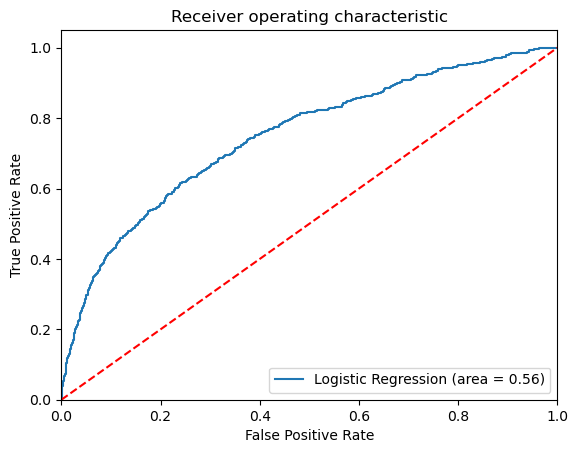

In [15]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

logit_roc_auc = roc_auc_score(y_test, logreg_model.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg_model.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [16]:
import statsmodels.api as sm
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, classification_report

# Adding a constant to the model (intercept term)
X_train_const = sm.add_constant(X_train)
X_test_const = sm.add_constant(X_test)

# Initialize the logistic regression model
logit_model = sm.Logit(y_train, X_train_const)

# Train the model
result = logit_model.fit()

# Print the summary of the model
print(result.summary())

# Get p-values of coefficients
p_values = result.pvalues

# Significant coefficients (assuming alpha = 0.05)
significant_coefs = p_values[p_values < 0.05]
print("Significant coefficients:")
print(significant_coefs)

# Predict on the testing set
y_pred_prob = result.predict(X_test_const)
y_pred = (y_pred_prob >= 0.5).astype(int)  # Convert probabilities to binary outcomes

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Calculate F1 score
f1 = f1_score(y_test, y_pred)
print("F1 Score:", f1)

# Calculate AUC
auc = roc_auc_score(y_test, y_pred_prob)
print("AUC:", auc)

# Generate classification report
print(classification_report(y_test, y_pred))


Optimization terminated successfully.
         Current function value: 0.401785
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                helpful   No. Observations:                14991
Model:                          Logit   Df Residuals:                    14977
Method:                           MLE   Df Model:                           13
Date:                Thu, 13 Jun 2024   Pseudo R-squ.:                  0.1258
Time:                        15:54:40   Log-Likelihood:                -6023.2
converged:                       True   LL-Null:                       -6890.2
Covariance Type:            nonrobust   LLR p-value:                     0.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.7720      0.025    -69.965      0.000      -1.822      -1.722
x1            -0.2992      0.